In [37]:
import numpy as np
import codecs
import array
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_tdms(path, ch_num):
    ch = [[] for _ in range(ch_num)]
    with codecs.open(path, 'rb') as f:
        while True:
            # リードインと呼ばれる部分の読み込み
            tdms = f.read(28) 
            # print(f.tell())
            # print(tdms)
            #if b'TDSm' != tdms[:4]:
            #    continue

            # ファイルを最後まで読み込んだら終了
            if tdms==b'': 
                break

            # データとその区切りを取得
            # 次のセグメントの位置を抽出
            seg_ofs = tdms[12:20]
            by1 = array.array('l')
            by1.frombytes( seg_ofs )
            seg_ofs = np.asarray(by1)[0]
            # データの位置を抽出
            data_ofs= tdms[20:28] 
            by2 = array.array('l')
            by2.frombytes( data_ofs )
            data_ofs = np.asarray(by2)[0]

            # データのある部分まで読み飛ばす
            tdms = f.read(data_ofs)
            #print(tdms[:200], len(tdms))
            #if len(ch[0])==2:
            #    exit()
            #if len(ch[0])==0:
            #    head=tdms
            # データ部分の読み込み
            tdms = f.read(seg_ofs-data_ofs)
            by = array.array('f')
            by.frombytes( tdms )
            data = np.asarray( by )
            # print(data.shape)

            # 各チャンネルを取得
            for i in range(ch_num):
                ch[i].append( data[i::ch_num].reshape(-1,1) )

    for i in range(ch_num):
        ch[i] = np.vstack(ch[i])[:,0]

    return ch

In [25]:
path_num = 234
data_num = 24 + 2*(path_num-1)
pre_data_num = 24 + 2*(path_num-2)

path = rf'C:\Users\pmg07\Desktop\2021_1115_切削実験\ae\AE_{data_num}.tdms'
pre_path = rf'C:\Users\pmg07\Desktop\2021_1115_切削実験\ae\AE_{pre_data_num}.tdms'

# ch_numにはチャンネル数を渡す. AE_Signal, AE_Noise, AE_AF で3チャンネル.
# data[0]にAE_Signal, data[1]にAE_Noise, data[2]にAE_AFのデータが入る.
d = load_tdms(path, ch_num=3)
pre_d = load_tdms(pre_path, ch_num=3)

# 例：各データの前方・後方10データずつ表示
# print( data[0][:10], data[0][-10:] )
# print( data[1][:10], data[1][-10:] )
# print( data[2][:10], data[2][-10:] )

In [12]:
print(len(d[1]))
print(len(pre_d[1]))

15646604
15629484


In [13]:
# 時間を表す配列を作る
#time_d = []
# time_length = 16.668
# 時間を表す配列を作るために、16,548,822(flatten_all_dataの長さ)分だけ
# sample_rate × i をする。ただし、16.668(time_length)を超えない時まで
# for i in range(1, len(data[0]+1)):
#     if(time_length < sample_rate*(i-1)):
#         break
#     time_d.append(sample_rate*(i-1))

In [42]:
# 1サンプリングするのにかかる時間
dt = 1/10**6
last_t = 0
# if data_num == 24:
#     last_t = 0
# else:
#     last_t = len(pre_d[0]) * dt

N = len(d[0])
t_d = np.linspace(last_t, last_t + N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
cd_d = t_d*(190/60)/1000 + (path_num-1)*49/1000

# dict1 = dict(time=t_d[0:-1:10000], cd_d = cd_d[0:-1:10000], ae_amp=d[0][0:-1:10000])
dict1 = dict(time=t_d[0:25001]*1000, cd_d = cd_d[0:25001], ae_amp=d[0][0:25001])

df1 = pd.DataFrame(data=dict1)
df1.to_csv(f'AE_Amplitude_10000_{data_num}.csv')

df = pd.read_csv(f'AE_Amplitude_10000_490.csv')


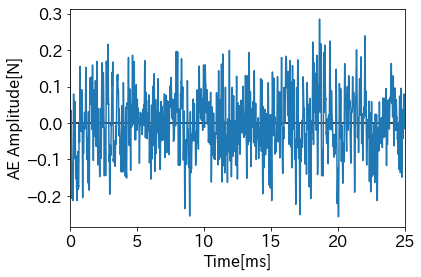

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = plt.plot(df['time'], df['ae_amp'])
ax.set_xlim(0,25)
# ax.set_ylim(0,0)
p = ax.set_xlabel("Time[ms]", fontsize=16)
p = ax.set_ylabel("AE Amplitude[N]", fontsize=16)
p = plt.tick_params(labelsize=16)
p = plt.hlines([0],0,25)

In [125]:
# dict1 = dict(time=time_d[:3000000], value=data[0][:3000000])
# dict2 = dict(time=time_d[3000000:6000000], value=data[0][3000000:6000000])
# dict3 = dict(time=time_d[6000000:9000000], value=data[0][6000000:9000000])
# dict4 = dict(time=time_d[9000000:12000000], value=data[0][9000000:12000000])
# dict5 = dict(time=time_d[12000000:15000000], value=data[0][12000000:15000000])
# dict6 = dict(time=time_d[15000000:], value=data[0][15000000:-1])

In [128]:
# df1 = pd.DataFrame(data=dict1)
# df2 = pd.DataFrame(data=dict2)
# df3 = pd.DataFrame(data=dict3)
# df4 = pd.DataFrame(data=dict4)
# df5 = pd.DataFrame(data=dict5)
# df6 = pd.DataFrame(data=dict6)

In [129]:
# df1.to_csv('AE_tdms_to_csv_with_ishidaSan.csv')
# df2.to_csv('AE_tdms_to_csv_with_ishidaSan.csv', mode='a', header=False)
# df3.to_csv('AE_tdms_to_csv_with_ishidaSan.csv', mode='a', header=False)
# df4.to_csv('AE_tdms_to_csv_with_ishidaSan.csv', mode='a', header=False)
# df5.to_csv('AE_tdms_to_csv_with_ishidaSan.csv', mode='a', header=False)
# df6.to_csv('AE_tdms_to_csv_with_ishidaSan.csv', mode='a', header=False)